In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Dados disponíveis em: https://www.kaggle.com/datasets/urstrulyvikas/lending-club-loan-data-analysis

credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito do LendingClub.com e 0 caso contrário.

purpose: O propósito do empréstimo (assume os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").

int.rate: A taxa de juros do empréstimo, como uma proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados pelo LendingClub.com como mais arriscados recebem taxas de juros mais altas.

installment: As parcelas mensais devidas pelo mutuário se o empréstimo for financiado.

log.annual.inc: O logaritmo natural da renda anual autodeclarada do mutuário.

dti: A relação dívida/renda do mutuário (valor da dívida dividido pela renda anual).

fico: A pontuação de crédito FICO do mutuário.

days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.

revol.bal: O saldo rotativo do mutuário (valor não pago no final do ciclo de cobrança do cartão de crédito).

revol.util: A taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).

inq.last.6mths: O número de consultas do mutuário por credores nos últimos 6 meses.

delinq.2yrs: O número de vezes que o mutuário atrasou mais de 30 dias em um pagamento nos últimos 2 anos.

pub.rec: O número de registros públicos depreciativos do mutuário (declarações de falência, penhoras fiscais ou julgamentos).

In [4]:
Lendingclub = pd.read_csv('C:/Users/Samsung/Documents/GitHub-Datas/Machine_Learnin_Steps/Dataset Lending Club/loan_data.csv', sep=',')
Lendingclub.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
Lendingclub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
Lendingclub.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Vamos analisa a pontuação de crédito, para quem recebeu e quem não recebeu. Percebe-se uma diferença entre a pontuação dos dois grupos, conforme gráfico abaixo:

Text(0.5, 0, 'FICO')

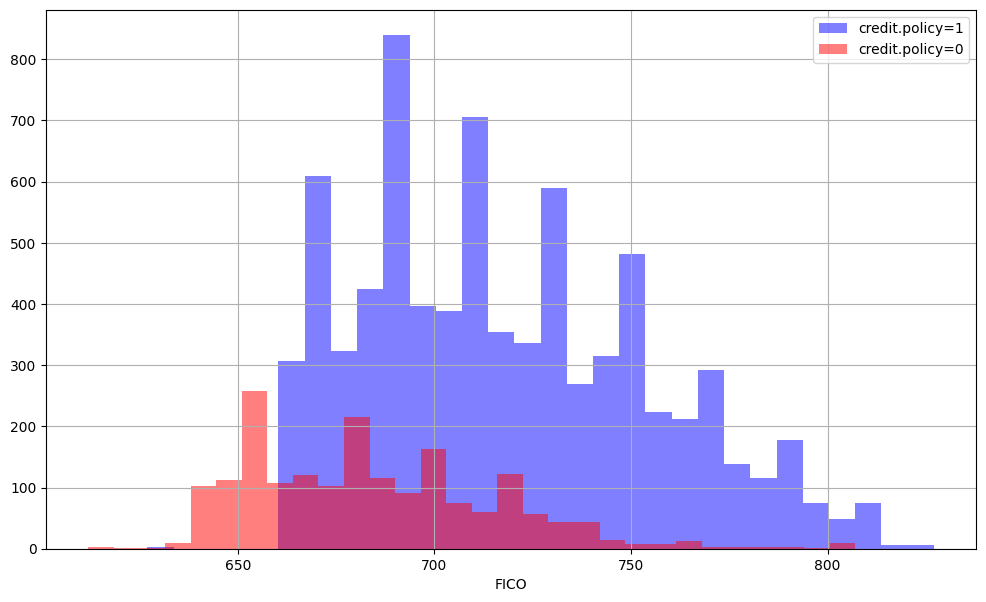

In [7]:
plt.figure(figsize=(12,7))
Lendingclub[Lendingclub['credit.policy']==1]['fico'].hist(alpha=0.5, color ='blue', bins=30, label='credit.policy=1')
Lendingclub[Lendingclub['credit.policy']==0]['fico'].hist(alpha=0.5, color ='red', bins=30, label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'Inadimplente')

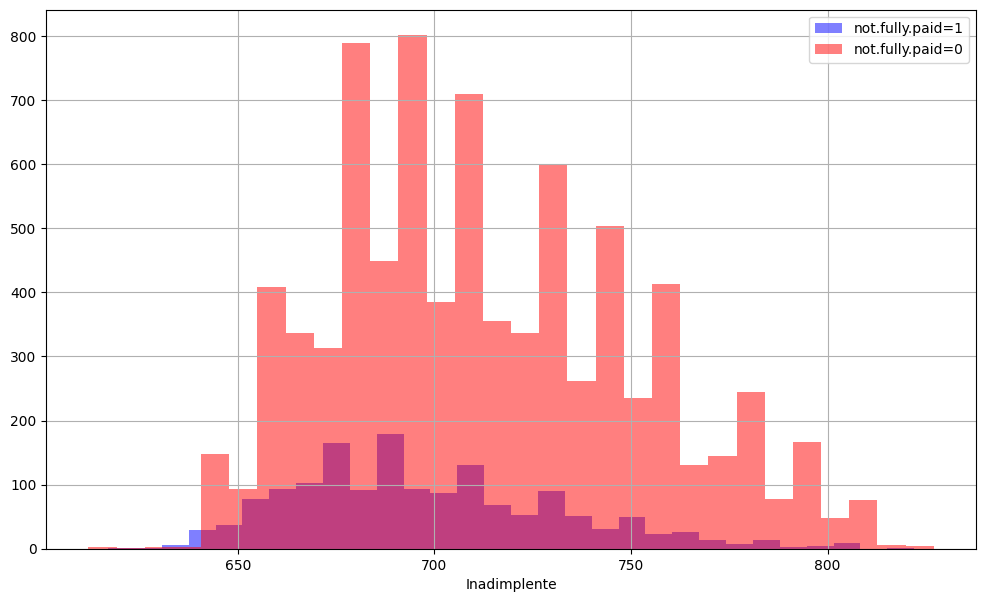

In [8]:
plt.figure(figsize=(12,7))
Lendingclub[Lendingclub['not.fully.paid']==1]['fico'].hist(alpha=0.5, color ='blue', bins=30, label='not.fully.paid=1')
Lendingclub[Lendingclub['not.fully.paid']==0]['fico'].hist(alpha=0.5, color ='red', bins=30, label='not.fully.paid=0')
plt.legend()
plt.xlabel('Inadimplente')

#### Utilizando a variável 'not.fully.paid' podemos ver os inadimplentes, perceba que os grupos permanecem semelhantes, possuem aproximadamente mesma distribuição.

<Axes: xlabel='purpose', ylabel='count'>

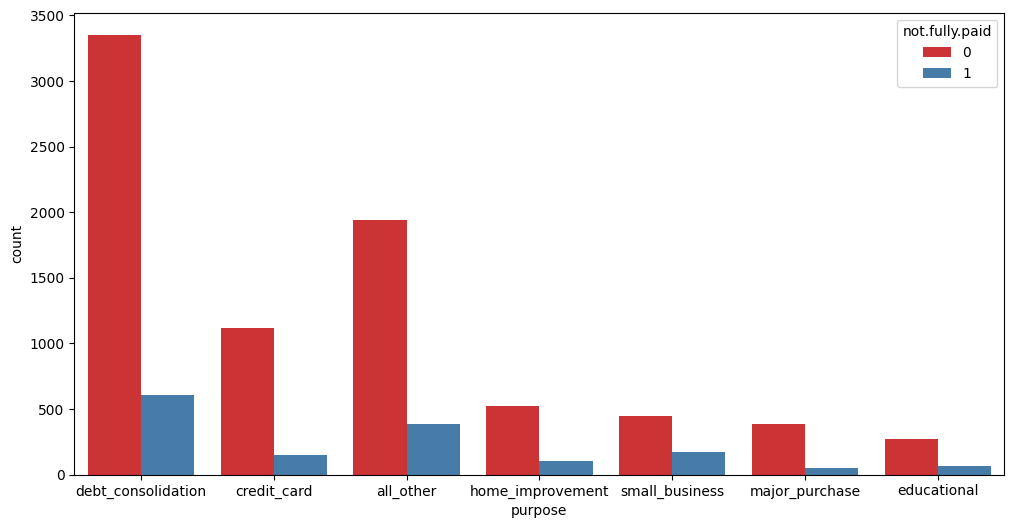

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=Lendingclub, palette= 'Set1')

#### Menor o score, maior o juros e vice-versa.

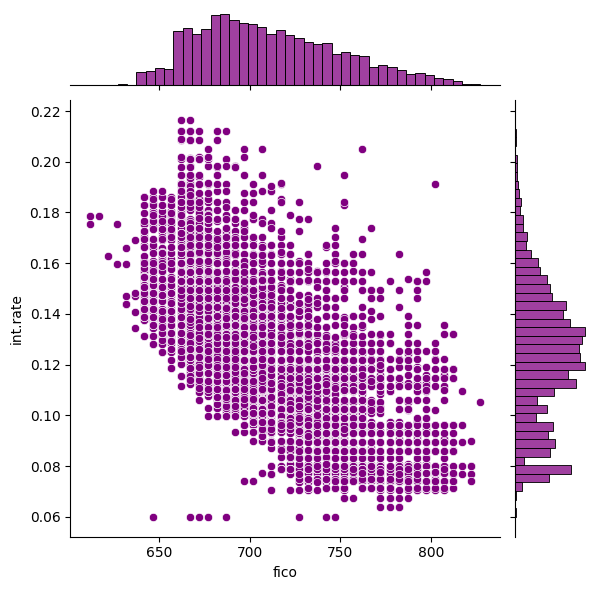

In [10]:
sns.jointplot(x='fico', y='int.rate',data=Lendingclub, color='purple')

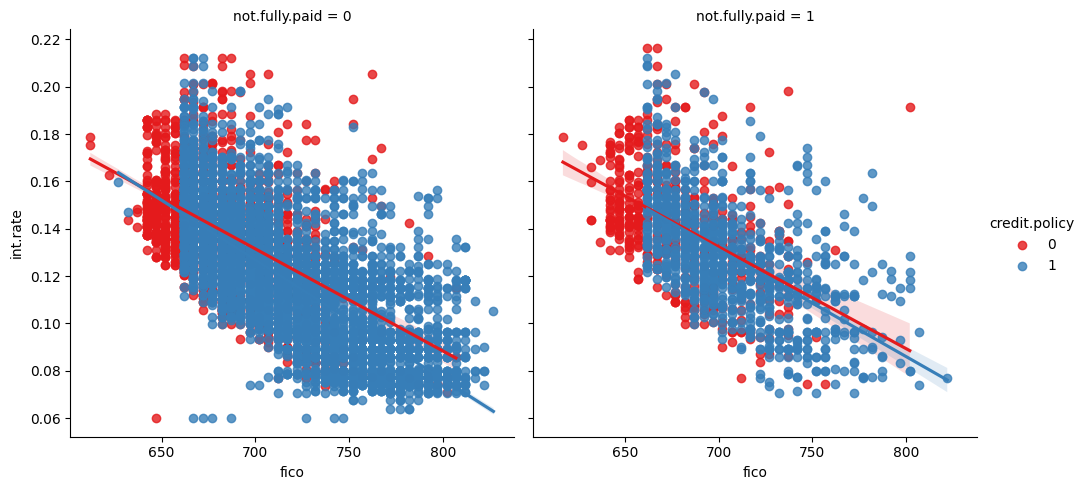

In [11]:
sns.lmplot(x='fico',y='int.rate',data=Lendingclub,hue='credit.policy', col='not.fully.paid', palette='Set1')

#### Vamos treinar o modelo de Decision Tree
### Tem uma variável que pode ajudar a explicar a inadimplência, que é o propósito do empréstimo. Para usarmos essa variável será necessário transforma-la em Dummy.

In [12]:
Lendingclub['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

#### Vamos transforma-la em variaveis Dummies.

In [13]:
feats = ['purpose']

In [14]:
Lendingclub_Dummy = pd.get_dummies(Lendingclub, columns=feats, drop_first=True)

In [17]:
Lendingclub_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = Lendingclub_Dummy.drop('not.fully.paid', axis=1)
Y = Lendingclub_Dummy['not.fully.paid']
x_train, x_test, y_train, y_test  = train_test_split(X ,Y , test_size=0.3,random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
pred = dtree.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [31]:
print(confusion_matrix(y_test, pred))

[[1992  439]
 [ 335  108]]


#### Agora iremos utilizar o random florest.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=500)

In [34]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [35]:
pred = rfc.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [38]:
print(confusion_matrix(y_test, pred))

[[2423    8]
 [ 433   10]]


#### Ajustando o modelo.

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [44]:
pred = rfc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

[[2423    8]
 [ 435    8]]


In [42]:
from sklearn.metrics import recall_score

# Ajustar threshold manualmente
probabilities = rfc.predict_proba(x_test)[:, 1]  # Probabilidade da classe positiva
threshold = 0.1  # Ajustar o limiar
pred = (probabilities >= threshold).astype(int)

print("Recall:", recall_score(y_test, pred))

Recall: 0.873589164785553


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score

# Treinar o modelo
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(x_train, y_train)

# Probabilidades preditas
probabilities = rfc.predict_proba(x_test)[:, 1]

# Ajustar o limiar
threshold = 0.2
pred = (probabilities >= threshold).astype(int)

# Métricas
print("Recall:", recall_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("F1-Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))

Recall: 0.5259593679458239
Precision: 0.22955665024630542
F1-Score: 0.31961591220850477

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77      2431
           1       0.23      0.53      0.32       443

    accuracy                           0.65      2874
   macro avg       0.56      0.60      0.54      2874
weighted avg       0.79      0.65      0.70      2874


Confusion Matrix:
 [[1649  782]
 [ 210  233]]


In [61]:
# Ajustar o limiar
threshold = 0.49
pred = (probabilities >= threshold).astype(int)

# Métricas
print("Recall:", recall_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("F1-Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))

Recall: 0.029345372460496615
Precision: 0.6190476190476191
F1-Score: 0.056034482758620684

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.49      2874
weighted avg       0.81      0.85      0.78      2874


Confusion Matrix:
 [[2423    8]
 [ 430   13]]


In [62]:
# Ajustar o limiar
threshold = 0.60
pred = (probabilities >= threshold).astype(int)

# Métricas
print("Recall:", recall_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("F1-Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))

Recall: 0.0
Precision: 0.0
F1-Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874


Confusion Matrix:
 [[2430    1]
 [ 443    0]]


In [63]:
# Ajustar o limiar
threshold = 0.19
pred = (probabilities >= threshold).astype(int)

# Métricas
print("Recall:", recall_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("F1-Score:", f1_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))

Recall: 0.5598194130925508
Precision: 0.22484134179510426
F1-Score: 0.3208279430789133

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75      2431
           1       0.22      0.56      0.32       443

    accuracy                           0.63      2874
   macro avg       0.56      0.60      0.54      2874
weighted avg       0.79      0.63      0.68      2874


Confusion Matrix:
 [[1576  855]
 [ 195  248]]


In [48]:
best_threshold = 0
best_balance = 0

for threshold in np.arange(0.1, 1.0, 0.01):
    pred = (probabilities >= threshold).astype(int)
    precision_positive = precision_score(y_test, pred, pos_label=1)
    precision_negative = precision_score(y_test, pred, pos_label=0)
    balance = (precision_positive + precision_negative) / 2  # Média das precisões
    
    if balance > best_balance:
        best_balance = balance
        best_threshold = threshold

print(f"Melhor Limiar: {best_threshold:.2f}")
print(f"Precisão Positiva: {precision_positive:.2f}")
print(f"Precisão Negativa: {precision_negative:.2f}")

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision 

Melhor Limiar: 0.49
Precisão Positiva: 0.00
Precisão Negativa: 0.85


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision 

In [54]:
from sklearn.metrics import recall_score

# Probabilidades da classe positiva
probabilities = rfc.predict_proba(x_test)[:, 1]

# Inicializar variáveis para rastrear o melhor limiar
best_threshold = 0
best_recall = 0

# Testar diferentes limiares
for threshold in np.arange(0.1, 1.0, 0.01):
    pred = (probabilities >= threshold).astype(int)
    recall = recall_score(y_test, pred)
    
    if recall > best_recall:
        best_recall = recall
        best_threshold = threshold

print(f"Melhor Limiar: {best_threshold:.2f}")
print(f"Melhor Recall: {best_recall:.2f}")

Melhor Limiar: 0.10
Melhor Recall: 0.86


In [56]:
from sklearn.metrics import recall_score

# Inicializar variáveis
best_threshold = 0
best_macro_recall = 0

# Probabilidades da classe positiva
probabilities = rfc.predict_proba(x_test)

# Testar diferentes limiares
for threshold in np.arange(0.1, 1.0, 0.01):
    # Converter para classes baseadas no limiar
    pred = (probabilities[:, 1] >= threshold).astype(int)
    
    # Calcular Macro-Recall
    macro_recall = recall_score(y_test, pred, average='macro')
    
    if macro_recall > best_macro_recall:
        best_macro_recall = macro_recall
        best_threshold = threshold

print(f"Melhor Limiar: {best_threshold:.2f}")
print(f"Melhor Macro-Recall: {best_macro_recall:.2f}")


Melhor Limiar: 0.19
Melhor Macro-Recall: 0.60


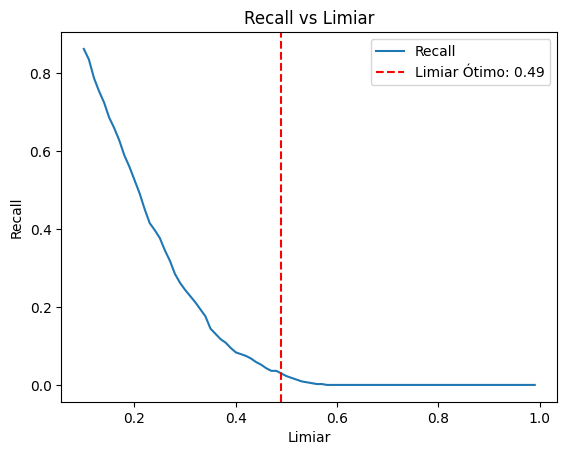

In [53]:
import matplotlib.pyplot as plt

thresholds = np.arange(0.1, 1.0, 0.01)
recall_values = []

for threshold in thresholds:
    pred = (probabilities >= threshold).astype(int)
    recall = recall_score(y_test, pred)
    recall_values.append(recall)

# Gráfico
plt.plot(thresholds, recall_values, label="Recall")
plt.xlabel("Limiar")
plt.ylabel("Recall")
plt.title("Recall vs Limiar")
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Limiar Ótimo: {best_threshold:.2f}")
plt.legend()
plt.show()
